PART 1 - Emissions By Country

In [31]:
 
import pandas as pd
import numpy as np
#reading the given dataset
df= pd.read_csv('emissions_by_country.csv')
df

,Country,ISO 3166-1 alpha-3,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750.0,0.000000,70,55455,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751.0,0.000000,66,45101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752.0,0.000000,72,31891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753.0,0.000000,44,35466,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754.0,0.000000,21,33247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017.0,36096.739276,22,32659,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018.0,36826.506600,44,21696,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019.0,37082.558969,78,52918,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020.0,35264.085734,34,39808,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


In [32]:
#printing the main charactersitics of the dataset
print(df.describe())

               Year         Total   Temperature  GDP Per Capita (USD)  \
count  62307.000000  62381.000000  63104.000000          63104.000000   
mean    1888.267097     73.683456     49.497813          39026.539015   
std      122.651184    843.930381     17.292092          10975.539432   
min     1003.000000      0.000000     20.000000          20000.000000   
25%     1816.000000      0.000000     35.000000          29498.750000   
50%     1886.000000      0.000000     49.000000          39067.000000   
75%     1955.000000      0.659520     64.000000          48544.250000   
max     2999.000000  37123.850352     79.000000          57999.000000   

               Coal           Oil           Gas        Cement       Flaring  \
count  21797.000000  21774.000000  21717.000000  20488.000000  21338.000000   
mean     127.387271    153.480038    125.162671     62.599364     56.074327   
std      677.951392    670.830891    514.391435    353.918064    337.629062   
min        0.000000      0

In [33]:
'''df=df.drop(columns=['Other'])
df'''

"df=df.drop(columns=['Other'])\ndf"

In [34]:
#Imputing the null values present in the numerical colulmns using mean
numericals = df.select_dtypes(include=['float64', 'int64']).columns
df[numericals] = df[numericals].fillna(df[numericals].mean().round(2))
#Imputing the null values present in the categorical colulmns using mode
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])
df

,Country,ISO 3166-1 alpha-3,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750.0,0.000000,70,55455,127.390000,153.480000,125.160000,62.600000,56.070000,849.400000,121.570000
1,Afghanistan,AFG,1751.0,0.000000,66,45101,127.390000,153.480000,125.160000,62.600000,56.070000,849.400000,121.570000
2,Afghanistan,AFG,1752.0,0.000000,72,31891,127.390000,153.480000,125.160000,62.600000,56.070000,849.400000,121.570000
3,Afghanistan,AFG,1753.0,0.000000,44,35466,127.390000,153.480000,125.160000,62.600000,56.070000,849.400000,121.570000
4,Afghanistan,AFG,1754.0,0.000000,21,33247,127.390000,153.480000,125.160000,62.600000,56.070000,849.400000,121.570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017.0,36096.739276,22,32659,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018.0,36826.506600,44,21696,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019.0,37082.558969,78,52918,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020.0,35264.085734,34,39808,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


In [35]:

for i in df:
    print("the null values in {0} are {1}".format(i, df[i].isnull().sum()))


the null values in Country are 0
the null values in ISO 3166-1 alpha-3 are 0
the null values in Year are 0
the null values in Total are 0
the null values in Temperature are 0
the null values in GDP Per Capita (USD) are 0
the null values in Coal are 0
the null values in Oil are 0
the null values in Gas are 0
the null values in Cement are 0
the null values in Flaring are 0
the null values in Other are 0
the null values in Per Capita are 0


In [36]:
#Handling the mismatched strings using str.title method
for col in categorical_columns:
    df[col]=df[col].str.title()
df

,Country,ISO 3166-1 alpha-3,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,Afg,1750.0,0.000000,70,55455,127.390000,153.480000,125.160000,62.600000,56.070000,849.400000,121.570000
1,Afghanistan,Afg,1751.0,0.000000,66,45101,127.390000,153.480000,125.160000,62.600000,56.070000,849.400000,121.570000
2,Afghanistan,Afg,1752.0,0.000000,72,31891,127.390000,153.480000,125.160000,62.600000,56.070000,849.400000,121.570000
3,Afghanistan,Afg,1753.0,0.000000,44,35466,127.390000,153.480000,125.160000,62.600000,56.070000,849.400000,121.570000
4,Afghanistan,Afg,1754.0,0.000000,21,33247,127.390000,153.480000,125.160000,62.600000,56.070000,849.400000,121.570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,Wld,2017.0,36096.739276,22,32659,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,Wld,2018.0,36826.506600,44,21696,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,Wld,2019.0,37082.558969,78,52918,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,Wld,2020.0,35264.085734,34,39808,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


In [37]:
#detecting the outliers using Interquartile Range (IQR) method
def outliers_replace(df):
    df2_count = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Quantile1 = df[column].quantile(0.25)
        Quantile3 = df[column].quantile(0.75)
        IQR = Quantile3 - Quantile1

        lower_bound = Quantile1 - 1.5 * IQR
        upper_bound = Quantile3 + 1.5 * IQR

        df2 = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        df2_count[column] = len(df2)
#imputing the detecyed outliers using mean of the specific column       
        mean_value = df[column].mean().round(2)
        df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), mean_value, df[column])

    
    print("Outliers replaced with mean are :")
    for column, count in df2_count.items():
        print(f"{column}: {count} outliers replaced")
    
    return df

df = outliers_replace(df)


Outliers replaced with mean are :
Year: 1145 outliers replaced
Total: 13520 outliers replaced
Temperature: 0 outliers replaced
GDP Per Capita (USD): 0 outliers replaced
Coal: 1362 outliers replaced
Oil: 1489 outliers replaced
Gas: 1319 outliers replaced
Cement: 682 outliers replaced
Flaring: 641 outliers replaced
Other: 2685 outliers replaced
Per Capita: 1158 outliers replaced


In [17]:
df

,Country,ISO 3166-1 alpha-3,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,Afg,1750.0,0.00,70.0,55455.0,127.39,153.48,125.16,62.6,56.07,849.4,121.570000
1,Afghanistan,Afg,1751.0,0.00,66.0,45101.0,127.39,153.48,125.16,62.6,56.07,849.4,121.570000
2,Afghanistan,Afg,1752.0,0.00,72.0,31891.0,127.39,153.48,125.16,62.6,56.07,849.4,121.570000
3,Afghanistan,Afg,1753.0,0.00,44.0,35466.0,127.39,153.48,125.16,62.6,56.07,849.4,121.570000
4,Afghanistan,Afg,1754.0,0.00,21.0,33247.0,127.39,153.48,125.16,62.6,56.07,849.4,121.570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,Wld,2017.0,73.68,22.0,32659.0,127.39,153.48,125.16,62.6,56.07,849.4,4.749682
63100,Global,Wld,2018.0,73.68,44.0,21696.0,127.39,153.48,125.16,62.6,56.07,849.4,4.792753
63101,Global,Wld,2019.0,73.68,78.0,52918.0,127.39,153.48,125.16,62.6,56.07,849.4,4.775633
63102,Global,Wld,2020.0,73.68,34.0,39808.0,127.39,153.48,125.16,62.6,56.07,849.4,4.497423


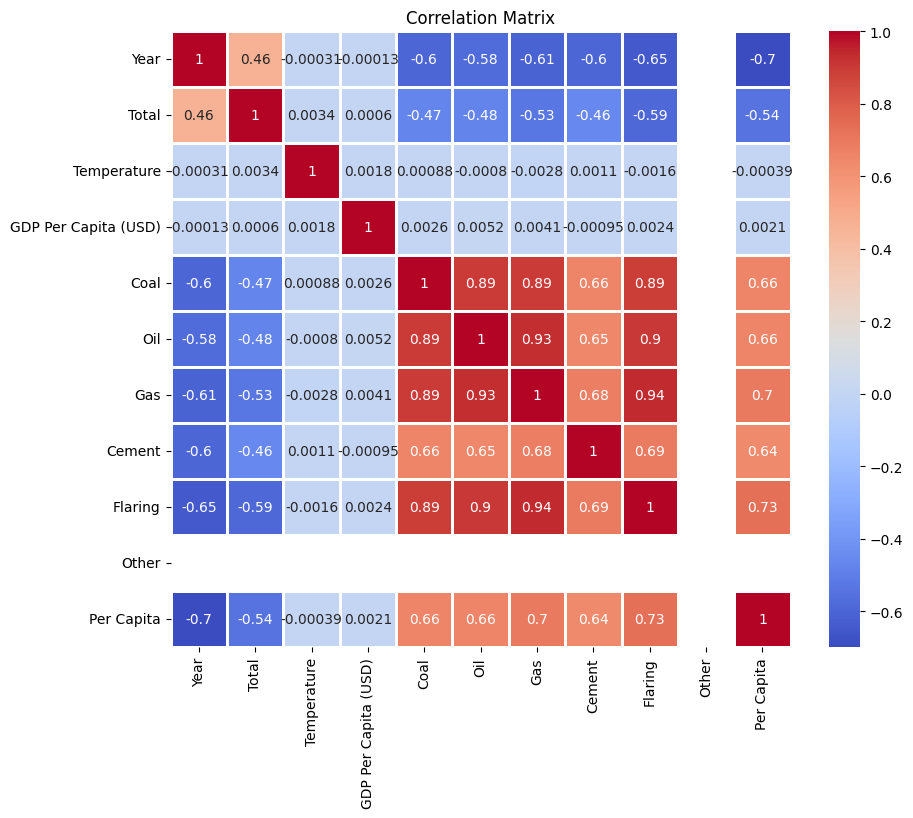

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
#Correlation matrix
numer_data = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numer_data.corr(), annot=True, cmap='coolwarm', linewidths=2)
plt.title('Correlation Matrix')
plt.show()

#https://www.kaggle.com/code/olgaberezovsky/correlation-analysis-using-python-pandas 
#The above reference is used for correlation and HeatMap

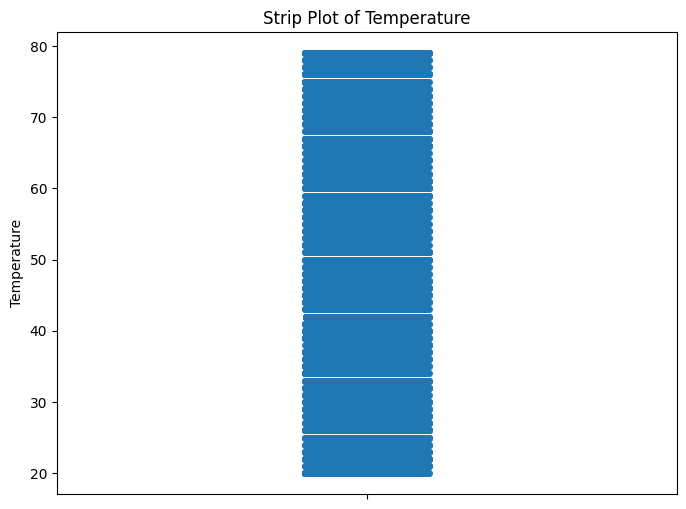

In [19]:
#stripplot
plt.figure(figsize=(8, 6))
sns.stripplot(data=df, y='Temperature', jitter=True)
plt.title('Strip Plot of Temperature')
plt.ylabel('Temperature')
plt.show()


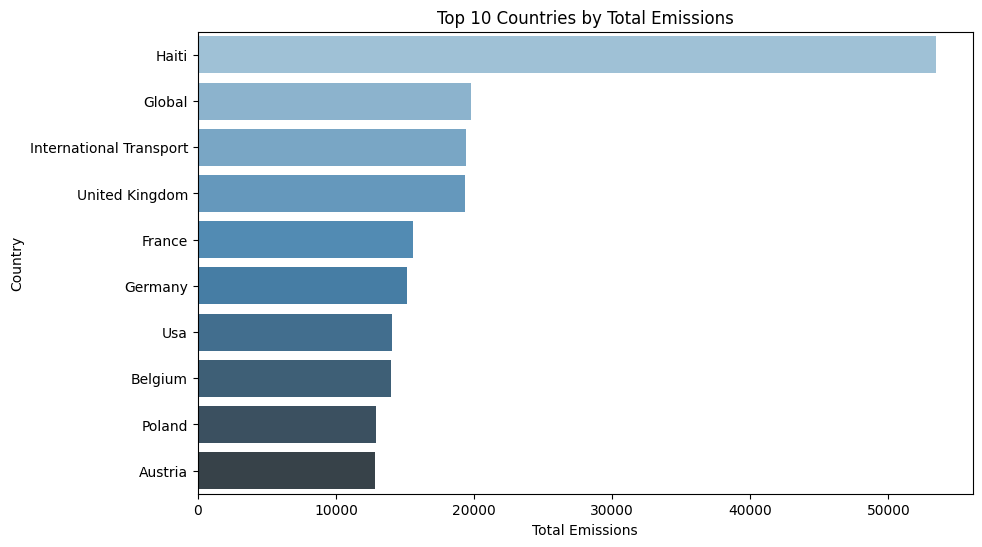

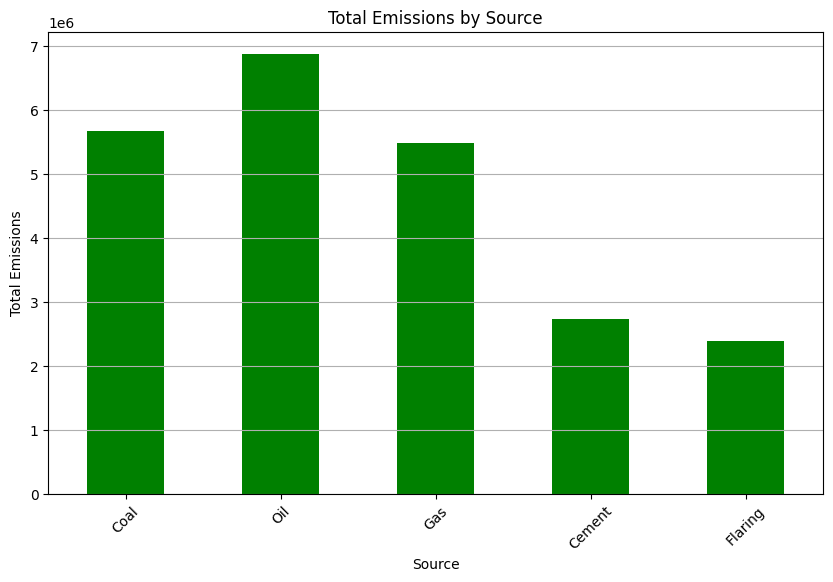

In [20]:
top_10_countries = df.groupby('Country')['Total'].sum().nlargest(10).reset_index()

#barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Total', y='Country', data=top_10_countries, hue='Country', palette='Blues_d', dodge=False)
plt.title('Top 10 Countries by Total Emissions')
plt.xlabel('Total Emissions')
plt.ylabel('Country')
plt.legend([], [], frameon=False) 
plt.show()

emissions_by_source = df[['Coal', 'Oil', 'Gas', 'Cement', 'Flaring']].sum()
plt.figure(figsize=(10, 6))
emissions_by_source.plot(kind='bar', color='green')
plt.title('Total Emissions by Source')
plt.ylabel('Total Emissions')
plt.xlabel('Source')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



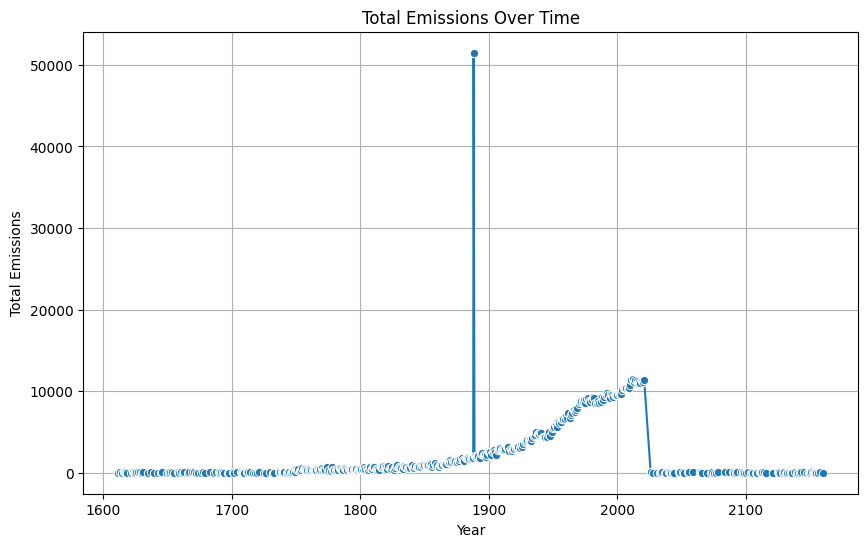

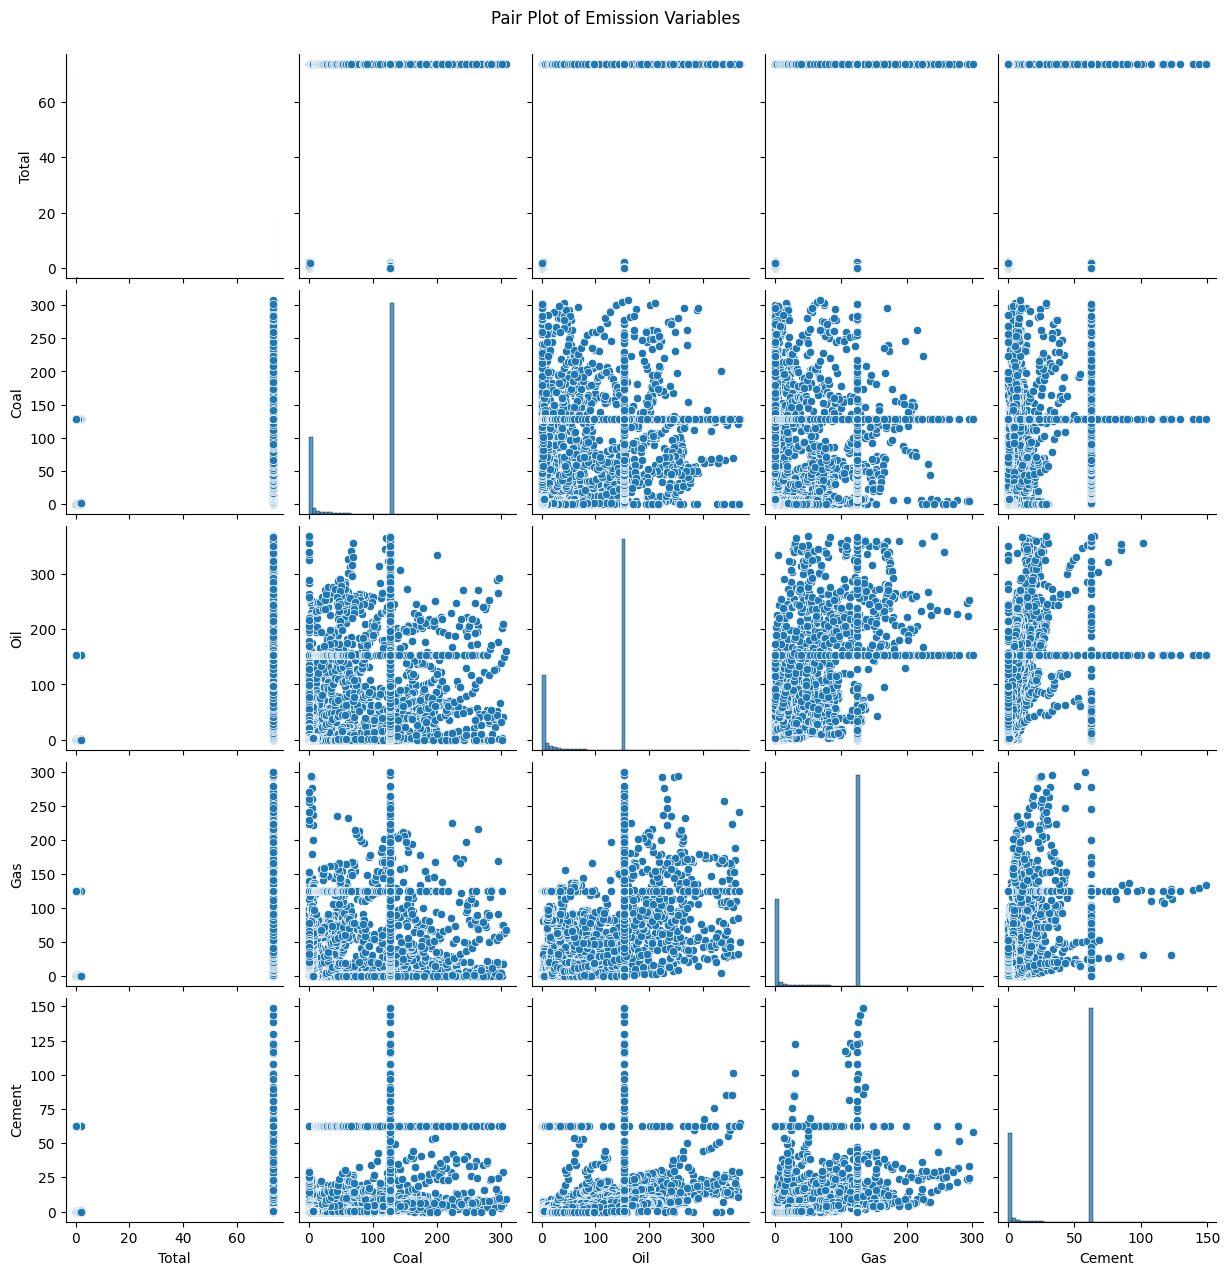

In [21]:

yearly_emissions = df.groupby('Year')['Total'].sum().reset_index()
#lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Total', data=yearly_emissions, marker='o')
plt.title('Total Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.grid(True)
plt.show()
#pairplot
sns.pairplot(df[['Total', 'Coal', 'Oil', 'Gas', 'Cement']])
plt.suptitle('Pair Plot of Emission Variables', y=1.02)
plt.show()

#https://medium.com/analytics-vidhya/pairplot-visualization-16325cd725e6
#The above reference is used for the pairplot


In [38]:
print(len(df["Country"].unique()))
print(len(df["ISO 3166-1 alpha-3"].unique()))

232
225


In [39]:
#converting the categorical columns into codes 
df['Country_num'] = pd.Categorical(df['Country']).codes
df['ISO 3166-1 alpha-3_num'] = pd.Categorical(df['ISO 3166-1 alpha-3']).codes

df

,Country,ISO 3166-1 alpha-3,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Country_num,ISO 3166-1 alpha-3_num
0,Afghanistan,Afg,1750.0,0.00,70.0,55455.0,127.39,153.48,125.16,62.6,56.07,849.4,121.570000,0,1
1,Afghanistan,Afg,1751.0,0.00,66.0,45101.0,127.39,153.48,125.16,62.6,56.07,849.4,121.570000,0,1
2,Afghanistan,Afg,1752.0,0.00,72.0,31891.0,127.39,153.48,125.16,62.6,56.07,849.4,121.570000,0,1
3,Afghanistan,Afg,1753.0,0.00,44.0,35466.0,127.39,153.48,125.16,62.6,56.07,849.4,121.570000,0,1
4,Afghanistan,Afg,1754.0,0.00,21.0,33247.0,127.39,153.48,125.16,62.6,56.07,849.4,121.570000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,Wld,2017.0,73.68,22.0,32659.0,127.39,153.48,125.16,62.6,56.07,849.4,4.749682,79,217
63100,Global,Wld,2018.0,73.68,44.0,21696.0,127.39,153.48,125.16,62.6,56.07,849.4,4.792753,79,217
63101,Global,Wld,2019.0,73.68,78.0,52918.0,127.39,153.48,125.16,62.6,56.07,849.4,4.775633,79,217
63102,Global,Wld,2020.0,73.68,34.0,39808.0,127.39,153.48,125.16,62.6,56.07,849.4,4.497423,79,217


In [40]:
#building correlation matrix considering Country_num as the target
correlation = df.corr(numeric_only=True)
correlation_tar = correlation['Country_num'].drop('Country_num')
print(correlation_tar)

threshold = 0.001

uncorrelation = correlation_tar[abs(correlation_tar) < threshold].index.tolist()
print(uncorrelation)
df=df.drop(columns=uncorrelation)
df

Year                     -0.000538
Total                     0.014055
Temperature              -0.000771
GDP Per Capita (USD)     -0.000060
Coal                      0.014276
Oil                      -0.001401
Gas                       0.000419
Cement                   -0.005557
Flaring                  -0.006354
Other                          NaN
Per Capita                0.003828
ISO 3166-1 alpha-3_num    0.831402
Name: Country_num, dtype: float64
['Year', 'Temperature', 'GDP Per Capita (USD)', 'Gas']


,Country,ISO 3166-1 alpha-3,Total,Coal,Oil,Cement,Flaring,Other,Per Capita,Country_num,ISO 3166-1 alpha-3_num
0,Afghanistan,Afg,0.00,127.39,153.48,62.6,56.07,849.4,121.570000,0,1
1,Afghanistan,Afg,0.00,127.39,153.48,62.6,56.07,849.4,121.570000,0,1
2,Afghanistan,Afg,0.00,127.39,153.48,62.6,56.07,849.4,121.570000,0,1
3,Afghanistan,Afg,0.00,127.39,153.48,62.6,56.07,849.4,121.570000,0,1
4,Afghanistan,Afg,0.00,127.39,153.48,62.6,56.07,849.4,121.570000,0,1
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,Wld,73.68,127.39,153.48,62.6,56.07,849.4,4.749682,79,217
63100,Global,Wld,73.68,127.39,153.48,62.6,56.07,849.4,4.792753,79,217
63101,Global,Wld,73.68,127.39,153.48,62.6,56.07,849.4,4.775633,79,217
63102,Global,Wld,73.68,127.39,153.48,62.6,56.07,849.4,4.497423,79,217


In [41]:
df_3=df
df_3.to_csv('emissions_by_country_preprocessed_3.csv', index=False)

In [34]:
'''for i in categorical_columns:
    print(df[i].unique())
'''

'for i in categorical_columns:\n    print(df[i].unique())\n'

In [42]:
#applying one hot encoding for categorical columns
df = pd.get_dummies(df, columns=['Country', 'ISO 3166-1 alpha-3'])
df = df.astype(int)
print("Converted Data is as follows ")
df

Converted Data is as follows 


,Total,Coal,Oil,Cement,Flaring,Other,Per Capita,Country_num,ISO 3166-1 alpha-3_num,Country_Afghanistan,...,ISO 3166-1 alpha-3_Vnm,ISO 3166-1 alpha-3_Vut,ISO 3166-1 alpha-3_Wld,ISO 3166-1 alpha-3_Wlf,ISO 3166-1 alpha-3_Wsm,ISO 3166-1 alpha-3_Xit,ISO 3166-1 alpha-3_Yem,ISO 3166-1 alpha-3_Zaf,ISO 3166-1 alpha-3_Zmb,ISO 3166-1 alpha-3_Zwe
0,0,127,153,62,56,849,121,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,127,153,62,56,849,121,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,127,153,62,56,849,121,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,127,153,62,56,849,121,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,127,153,62,56,849,121,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63099,73,127,153,62,56,849,4,79,217,0,...,0,0,1,0,0,0,0,0,0,0
63100,73,127,153,62,56,849,4,79,217,0,...,0,0,1,0,0,0,0,0,0,0
63101,73,127,153,62,56,849,4,79,217,0,...,0,0,1,0,0,0,0,0,0,0
63102,73,127,153,62,56,849,4,79,217,0,...,0,0,1,0,0,0,0,0,0,0


In [43]:
columns_n=df[[ 'Total', 'Coal', 'Oil', 'Cement', 'Flaring', 'Other', 'Per Capita']]
for k in columns_n:
    minimum_values = df[k].min()
    maximum_values = df[k].max()
    df[f'{k}_normalised'] = (df[k] - minimum_values)/(maximum_values - minimum_values)
df



,Total,Coal,Oil,Cement,Flaring,Other,Per Capita,Country_num,ISO 3166-1 alpha-3_num,Country_Afghanistan,...,ISO 3166-1 alpha-3_Zaf,ISO 3166-1 alpha-3_Zmb,ISO 3166-1 alpha-3_Zwe,Total_normalised,Coal_normalised,Oil_normalised,Cement_normalised,Flaring_normalised,Other_normalised,Per Capita_normalised
0,0,127,153,62,56,849,121,0,1,1,...,0,0,0,0.0,0.412338,0.415761,0.416107,0.430769,NaN,0.458333
1,0,127,153,62,56,849,121,0,1,1,...,0,0,0,0.0,0.412338,0.415761,0.416107,0.430769,NaN,0.458333
2,0,127,153,62,56,849,121,0,1,1,...,0,0,0,0.0,0.412338,0.415761,0.416107,0.430769,NaN,0.458333
3,0,127,153,62,56,849,121,0,1,1,...,0,0,0,0.0,0.412338,0.415761,0.416107,0.430769,NaN,0.458333
4,0,127,153,62,56,849,121,0,1,1,...,0,0,0,0.0,0.412338,0.415761,0.416107,0.430769,NaN,0.458333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63099,73,127,153,62,56,849,4,79,217,0,...,0,0,0,1.0,0.412338,0.415761,0.416107,0.430769,NaN,0.015152
63100,73,127,153,62,56,849,4,79,217,0,...,0,0,0,1.0,0.412338,0.415761,0.416107,0.430769,NaN,0.015152
63101,73,127,153,62,56,849,4,79,217,0,...,0,0,0,1.0,0.412338,0.415761,0.416107,0.430769,NaN,0.015152
63102,73,127,153,62,56,849,4,79,217,0,...,0,0,0,1.0,0.412338,0.415761,0.416107,0.430769,NaN,0.015152


In [45]:
df.to_csv('emissions_by_country_preprocessed.csv', index=False)